In [1]:
from svm_custom import SVM
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

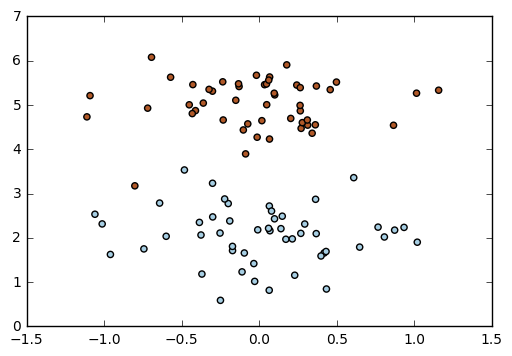

     pcost       dcost       gap    pres   dres
 0: -5.8005e+01 -5.7412e+03  2e+04  7e-01  4e-14
 1:  1.9539e+00 -1.1443e+03  2e+03  4e-02  5e-14
 2:  3.1424e+00 -2.3329e+02  3e+02  7e-03  5e-14
 3: -1.9327e+01 -4.2866e+01  2e+01  3e-15  3e-14
 4: -2.7424e+01 -3.8492e+01  1e+01  4e-15  5e-14
 5: -3.3918e+01 -3.5776e+01  2e+00  8e-15  8e-14
 6: -3.4030e+01 -3.5341e+01  1e+00  3e-15  9e-14
 7: -3.4713e+01 -3.4800e+01  9e-02  8e-15  9e-14
 8: -3.4762e+01 -3.4765e+01  3e-03  1e-14  8e-14
 9: -3.4764e+01 -3.4764e+01  3e-05  1e-15  8e-14
Optimal solution found.


In [10]:
X, y = datasets.make_blobs(centers=[[0, 2], [0, 5]], cluster_std=[0.5, 0.5])
y[y == 0] = -1

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired)
plt.show()

mysvm = SVM(C=10)
mysvm.fit(X, y)

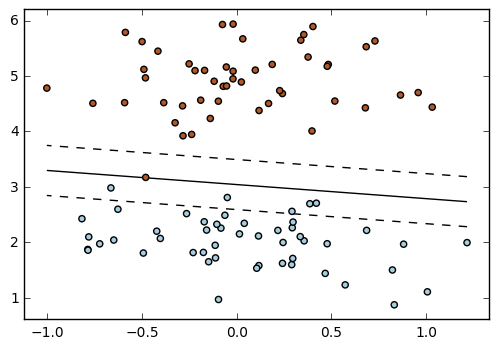

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

# Determine decision boundry
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
b_test = list(np.c_[XX.ravel(), YY.ravel()])
Z = mysvm.decision_function(b_test)

# Put the result into a color plot
Z = np.asarray(Z)
Z = Z.reshape(XX.shape)
#plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-1, 0, 1])
plt.show()

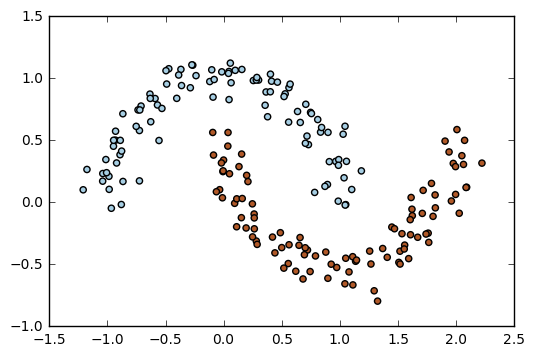

     pcost       dcost       gap    pres   dres
 0:  3.6691e+02 -6.6016e+03  1e+04  2e-01  7e-15
 1:  1.9960e+02 -9.8349e+02  1e+03  2e-02  6e-15
 2: -6.1505e+00 -2.8304e+02  3e+02  2e-03  5e-15
 3: -5.2583e+01 -1.6748e+02  1e+02  8e-04  6e-15
 4: -6.4565e+01 -1.6550e+02  1e+02  6e-04  6e-15
 5: -7.0347e+01 -1.5960e+02  9e+01  4e-04  7e-15
 6: -8.5665e+01 -1.4929e+02  6e+01  6e-05  7e-15
 7: -9.1623e+01 -1.3908e+02  5e+01  4e-05  7e-15
 8: -9.2368e+01 -1.3639e+02  4e+01  3e-05  8e-15
 9: -1.0158e+02 -1.1953e+02  2e+01  9e-06  7e-15
10: -1.0485e+02 -1.1329e+02  8e+00  2e-06  7e-15
11: -1.0797e+02 -1.0876e+02  8e-01  1e-07  8e-15
12: -1.0830e+02 -1.0832e+02  2e-02  3e-09  8e-15
13: -1.0831e+02 -1.0831e+02  3e-04  3e-11  8e-15
14: -1.0831e+02 -1.0831e+02  3e-06  3e-13  7e-15
Optimal solution found.


In [4]:
X, y = datasets.make_moons(n_samples=200, noise=0.1)
y[y == 0] = -1

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired)
plt.show()

mysvm = SVM(C=10, kernel='rbf', gamma=0.5)
#mysvm = SVM(C=1, kernel='poly', degree=3, coef0=0)
mysvm.fit(X, y)

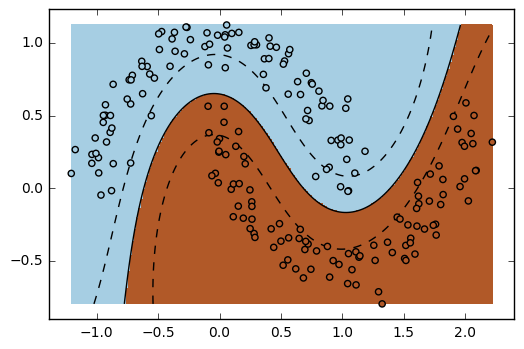

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, zorder=10)

x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

# Determine decision boundry
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
#XX, YY = np.mgrid[-10:10:200j, -10:10:200j]
b_test = list(np.c_[XX.ravel(), YY.ravel()])
Z = mysvm.decision_function(b_test)

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-1, 0, 1])
plt.show()

In [6]:
from sklearn.kernel_approximation import RBFSampler
from sklearn.preprocessing import PolynomialFeatures

def x_to_poly(x, degree=2):
    poly = PolynomialFeatures(degree)
    return poly.fit_transform(x)

def x_to_rbf(x, gamma=1.0, n=100):
    rbf_feature = RBFSampler(gamma=gamma, n_components=n, random_state=1)
    return rbf_feature.fit_transform(x)

In [7]:
X_rbf = x_to_rbf(X, gamma=0.5, n=100)

mysvm = SVM(C=10, kernel='linear')
mysvm.fit(X_rbf, y)

mysvm.score(X_rbf, y)

     pcost       dcost       gap    pres   dres
 0:  2.7269e+02 -7.2750e+03  1e+04  2e-01  7e-15
 1:  1.3735e+02 -1.1569e+03  1e+03  2e-02  8e-15
 2: -5.2979e+01 -3.7203e+02  3e+02  3e-03  7e-15
 3: -9.2753e+01 -3.0650e+02  2e+02  1e-03  7e-15
 4: -1.2473e+02 -2.3360e+02  1e+02  4e-04  8e-15
 5: -1.3308e+02 -2.2485e+02  9e+01  3e-04  8e-15
 6: -1.4794e+02 -2.0118e+02  5e+01  6e-05  1e-14
 7: -1.6055e+02 -1.7815e+02  2e+01  1e-05  9e-15
 8: -1.6548e+02 -1.7034e+02  5e+00  2e-06  1e-14
 9: -1.6702e+02 -1.6815e+02  1e+00  4e-07  9e-15
10: -1.6742e+02 -1.6757e+02  1e-01  4e-09  1e-14
11: -1.6749e+02 -1.6750e+02  6e-03  2e-10  1e-14
12: -1.6749e+02 -1.6749e+02  6e-05  2e-12  1e-14
Optimal solution found.


0.995

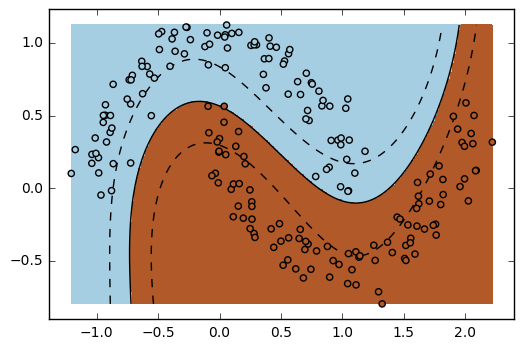

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, zorder=10)

x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

# Determine decision boundry
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
#XX, YY = np.mgrid[-10:10:200j, -10:10:200j]
b_test = list(np.c_[XX.ravel(), YY.ravel()])

b_rbf = x_to_rbf(b_test, gamma=0.5, n=100)

Z = mysvm.decision_function(b_rbf)

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-1, 0, 1])
plt.show()